## Target Variable Predicted and Feature Selection

In [3]:
# Import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read the csv file using pandas.read_csv function
# Analyse data set given for prediction
df = pd.read_csv("credit_card_default.csv")

In [5]:
# displays first 5 rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24.0,2,2,-1,-1,...,0.0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26.0,-1,2,0,0,...,3272.0,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34.0,0,0,0,0,...,14331.0,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37.0,0,0,0,0,...,28314.0,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# displays last 5 rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
29995,29996,220000,1,3,1,39.0,0,0,0,0,...,88004.0,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43.0,-1,-1,-1,-1,...,8979.0,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37.0,4,3,2,-1,...,20878.0,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41.0,1,-1,0,0,...,52774.0,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46.0,0,0,0,0,...,36535.0,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
# Use .shape to find the number of rows and columns of the dataframe
# There are 30000 rows and 25 columns
df.shape

(30000, 25)

In [8]:
# info method is used to find the data types of each column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         29997 non-null  float64
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  object 
 13  BILL_AMT2                   300

In [9]:
# unique() method can be used to see the unique values 
# PAY_AMT1 has values of data type object
# Check if there are any data which does not have data type float
df.PAY_AMT1.unique()

array(['0', '1518', '2000', ..., '10029', '9054', '85900'], dtype=object)

In [10]:
# describe() method is used to obtain some statistical data calculating like percentile, mean and std of the numerical values of the DataFrame
# 50% is the value that describes"the middle" of the data which is the median. 
# 25%, 75% is the border of the upper/lower quarter of the data
# std  is the standard deviation
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29997.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,29996.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485082,-0.016700,-0.133767,-0.166200,-0.220667,...,4.701315e+04,43254.798973,40311.400967,38871.760400,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217423,1.123802,1.197186,1.196868,1.169139,...,6.934939e+04,64310.642233,60797.155770,59554.107537,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2324.500000,1763.000000,1256.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Potential Bias in Demographic Features

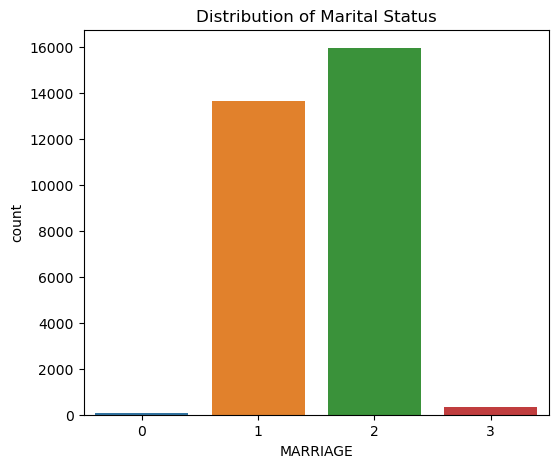

In [24]:
# Distribution of Marital Status using countplot
f, ax = plt.subplots(figsize=(6, 5))
plt.title("Distribution of Marital Status")
sns.countplot(data = df, x ='MARRIAGE')
plt.show()

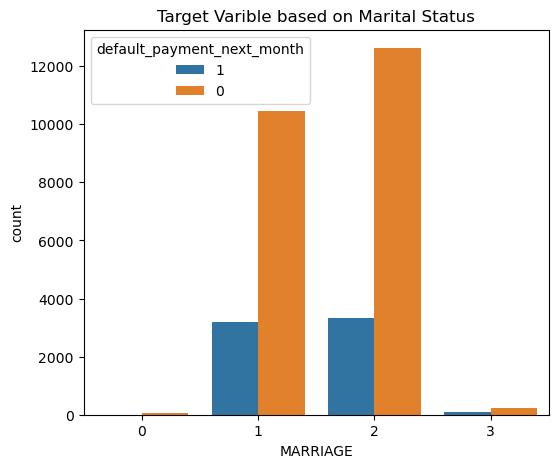

In [12]:
# To see if factors like MARRIAGE affect the target variable which in turn could unfairly favour or could disadvantage certain groups
f, ax = plt.subplots(figsize=(6, 5))
plt.title("Target Varible based on Marital Status")
df['default_payment_next_month'] = df['default_payment_next_month'].astype(str)
sns.countplot(data = df, x ='MARRIAGE', hue='default_payment_next_month')
plt.show()

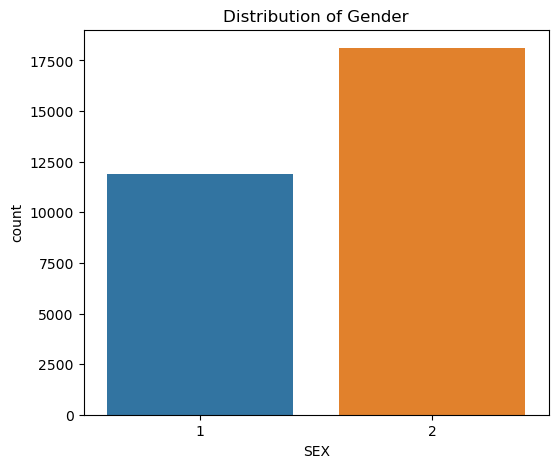

In [28]:
# # Distribution of Sex using countplot
f, ax = plt.subplots(figsize=(6, 5))
plt.title("Distribution of Gender")
sns.countplot(data = df, x ='SEX')
plt.show()

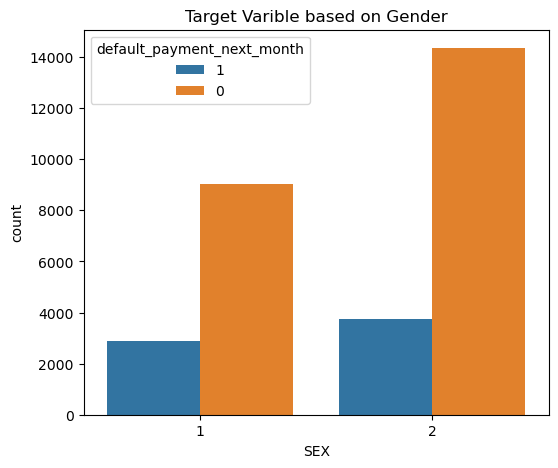

In [32]:
# To see if factors like SEX affect the target variable which in turn could unfairly favour or could disadvantage certain groups
f, ax = plt.subplots(figsize=(6, 5))
plt.title("Target Varible based on Gender")
sns.countplot(data = df, x ='SEX', hue='default_payment_next_month')
plt.show()

## Data preprocessing - Handle Missing Values

In [34]:
# isnull().sum() is used to check the number of missing values in each column
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           3
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     4
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      3
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [36]:
# isnull().sum().sum() - to find the total number of missing values in the dataframe 
df.isnull().sum().sum()

10

In [38]:
# returned rows where age is missing
age_null = pd.isnull(df['AGE'])
df[age_null] 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
103,104,50000,2,3,2,NaN,0,0,0,0,...,32496.0,23477,24094,1767,1362,1002,840,995,904,1
256,257,140000,2,2,1,NaN,0,-1,-1,-1,...,1355.0,1130,21361,1233,1075,1355,1130,21361,1347,0
426,427,20000,2,3,2,NaN,2,2,2,2,...,12583.0,15327,16414,3000,1500,0,3123,1500,1000,1


In [40]:
missing_values = ["n/a", "na", "--"] 
df = pd.read_csv("credit_card_default.csv", na_values = missing_values)

In [42]:
# Replace missing values or Nan values using mean value 
mean = df['AGE'].mean()
df['AGE'].fillna(mean, inplace=True)

In [44]:
mean = df['BILL_AMT1'].mean()
df['BILL_AMT1'].fillna(mean, inplace=True)

In [46]:
mean = df['BILL_AMT2'].mean()
df['BILL_AMT2'].fillna(mean, inplace=True)

In [48]:
mean = df['BILL_AMT4'].mean()
df['BILL_AMT4'].fillna(mean, inplace=True)

In [50]:
# Convert to integers, setting errors='coerce' will convert invalid parsing to NaN, then replace with 0
# Forced Conversion Using pd.to_numeric
df['PAY_AMT1'] = pd.to_numeric(df['PAY_AMT1'], errors='coerce').fillna(0).astype(int)

In [52]:
mean = df['PAY_AMT1'].mean()
df['PAY_AMT1'].fillna(mean, inplace=True) 

In [54]:
# Since there was no data that was of data type object
# Convert data type of the columns to int
df.AGE = df.AGE.astype('int')
df.BILL_AMT1 = df.BILL_AMT1.astype('int')
df.BILL_AMT2 = df.BILL_AMT2.astype('int')
df.BILL_AMT4 = df.BILL_AMT4.astype('int')
df.PAY_AMT1 = df.PAY_AMT1.astype('int')
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int32
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int32
BILL_AMT2                     int32
BILL_AMT3                     int64
BILL_AMT4                     int32
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int32
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default_payment_next_month    int64
dtype: object

In [56]:
# Now total number of null values = 0
df.isnull().sum().sum()

0

In [58]:
# Use duplicatd function to see if there are any rows that are duplicates
# Total number of duplicates = 0, hence no duplicates
df.duplicated().sum()

0

## Feature Scaling and Normalisation

In [61]:
# Use StandardScaler to standardise the numerical features
# we standarize the features to one scale because many features have different range of scale
# Logistic regression - standarising is optional but for liner regression, it is compulsory

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
features = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2",
            "BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]

df[features]= StandardScaler().fit_transform(df[features])
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,-1.136720,0.810161,0.185828,-1.057295,-1.246096,1.794564,1.782348,-0.696663,-0.666599,...,-0.672648,-0.663059,-0.652724,0,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,0.810161,0.185828,0.858557,-1.029102,-0.874991,1.782348,0.138865,0.188746,...,-0.621765,-0.606229,-0.597966,0,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,0.810161,0.185828,0.858557,-0.161122,0.014861,0.111736,0.138865,0.188746,...,-0.449789,-0.417188,-0.391630,1518,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,0.810161,0.185828,-1.057295,0.164370,0.014861,0.111736,0.138865,0.188746,...,-0.232342,-0.186729,-0.156579,2000,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,-1.234323,0.185828,-1.057295,2.334318,-0.874991,0.111736,-0.696663,0.188746,...,-0.347013,-0.348137,-0.331482,2000,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


One-hot or Label encoding is normally used to encode categorical variables.

There is no categorical variables in this dataset, only numerical values.
Hence, there is no need for one-hot or label encoding.

## Exploratory Data Analysis (EDA)
### Target Distribution
### Feature Correlations
### Demographic Disparities

Correlation with Target Variable:

 default_payment_next_month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013910
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010036
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014152
BILL_AMT1                    -0.019653
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072917
LIMIT_BAL                   

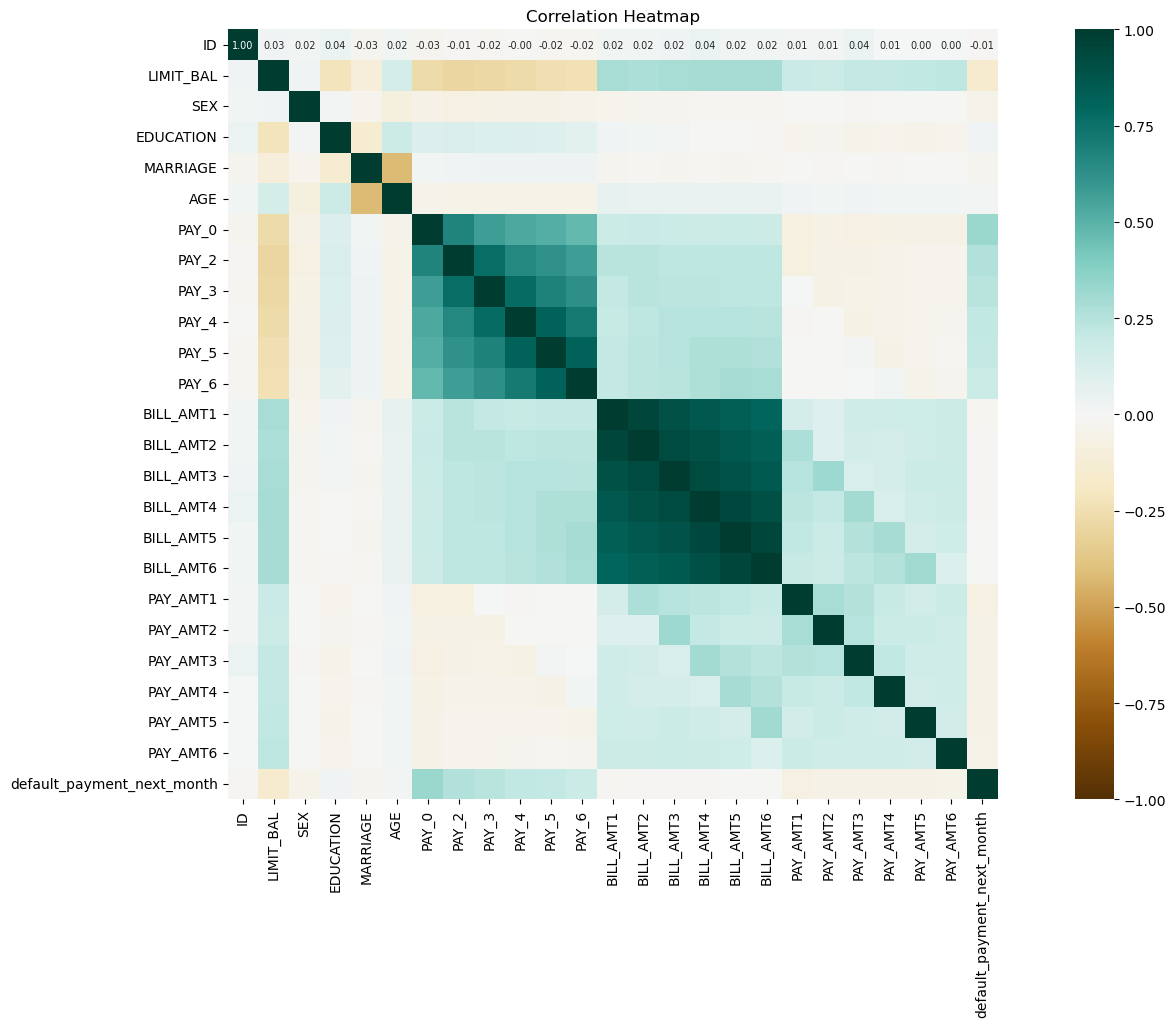

In [66]:
# To find correlation of the all features to the target variable using heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 10))
plt.title("Correlation Heatmap")
sns.heatmap(corrmat, square=True, vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 7}, cmap='BrBG');

# To find the correlation values of the features to the target variable arranged in DESCENDING order
correlation_with_target = corrmat['default_payment_next_month'].sort_values(ascending=False)
print("Correlation with Target Variable:\n\n", correlation_with_target)

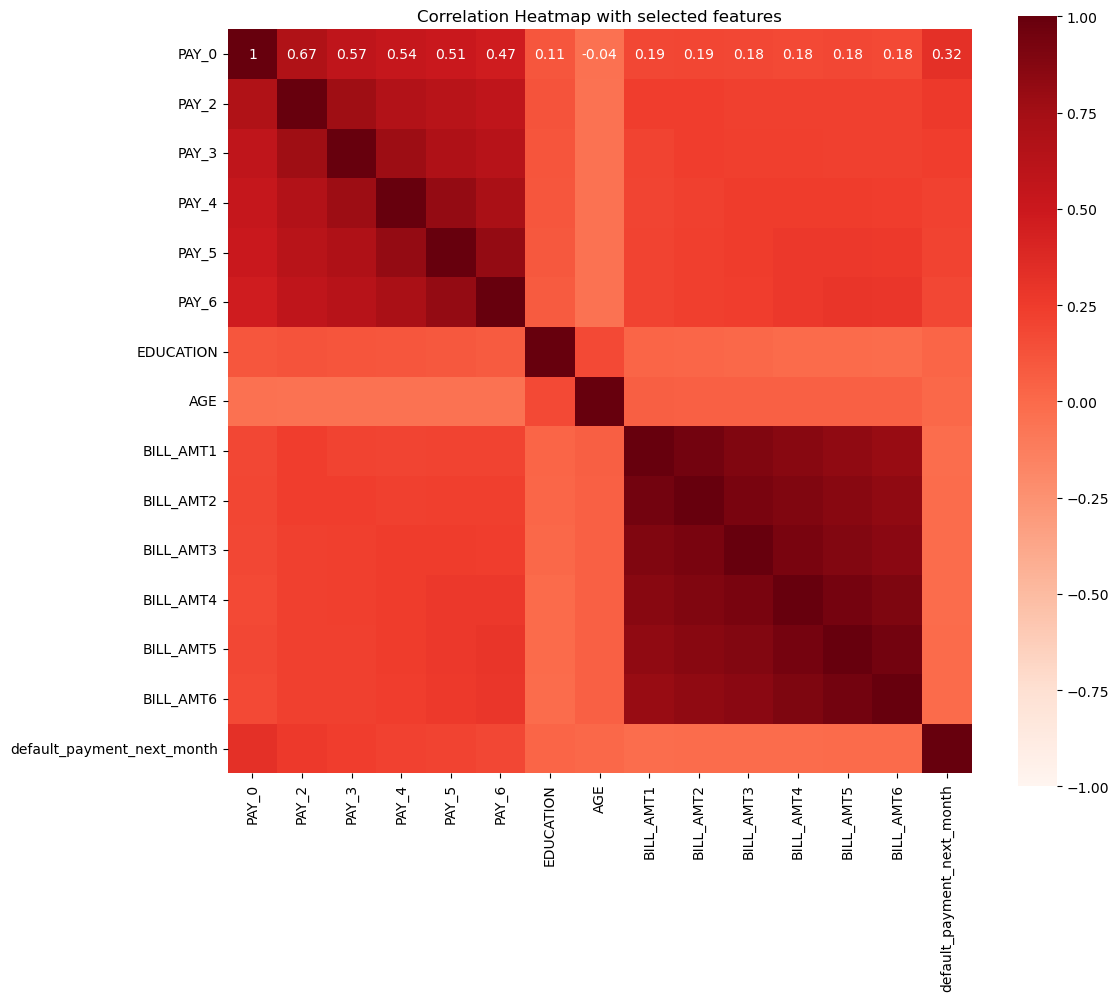

In [68]:
# To find correlation of the SELECTED features to the target variable using heatmap
features = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","EDUCATION", "AGE", "BILL_AMT1", "BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6", "default_payment_next_month"]
corrmat = df[features].corr()
f, ax = plt.subplots(figsize=(12, 10))
plt.title("Correlation Heatmap with selected features")
sns.heatmap(corrmat, square=True, vmin=-1, vmax=1, annot=True, cmap='Reds');

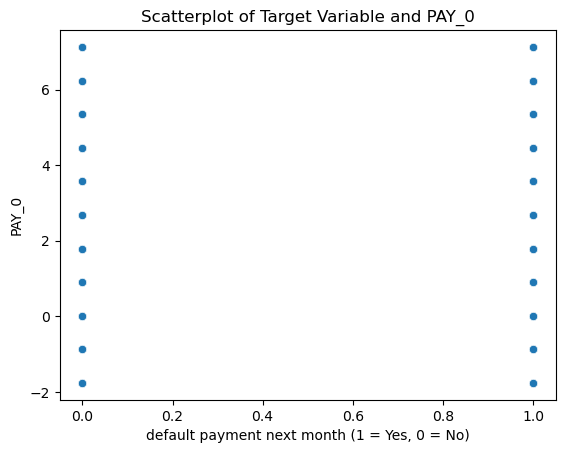

In [70]:
# To find the Relation between Target Variable and PAY_0 column
sns.scatterplot(x='default_payment_next_month', y="PAY_0",  data=df)
plt.title("Scatterplot of Target Variable and PAY_0")
plt.xlabel("default payment next month (1 = Yes, 0 = No)")
plt.ylabel("PAY_0")
plt.show()


## Disparities between Gender or Marital status Features

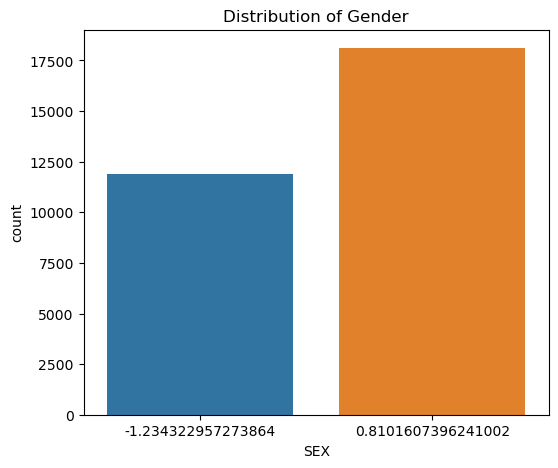

In [77]:
# Distribution of Gender with standardized values
f, ax = plt.subplots(figsize=(6, 5))
plt.title("Distribution of Gender")
sns.countplot(data = df, x ='SEX')
plt.show()

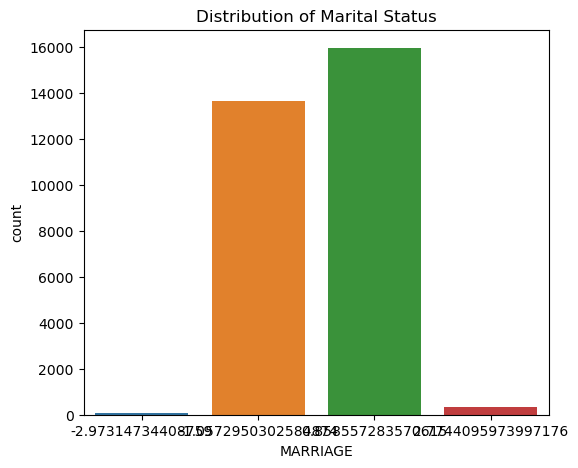

In [79]:
# Distribution of Marital Status with standardized values
f, ax = plt.subplots(figsize=(6, 5))
plt.title("Distribution of Marital Status")
sns.countplot(data = df, x ='MARRIAGE')
plt.show()

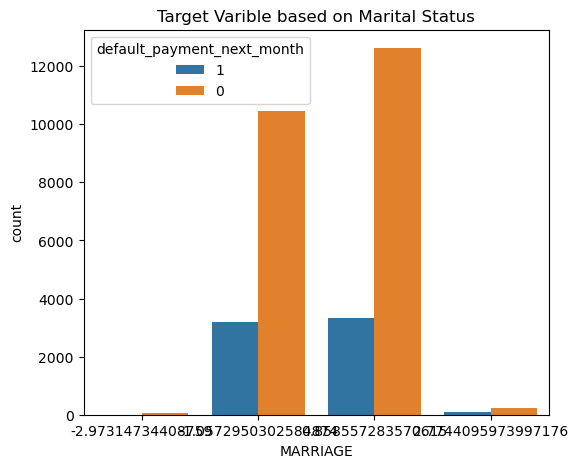

In [81]:
# Target Varible based on Marital Status with standardized values
f, ax = plt.subplots(figsize=(6, 5))
plt.title("Target Varible based on Marital Status")
df['default_payment_next_month'] = df['default_payment_next_month'].astype(str)
sns.countplot(data = df, x ='MARRIAGE', hue='default_payment_next_month')
plt.show()

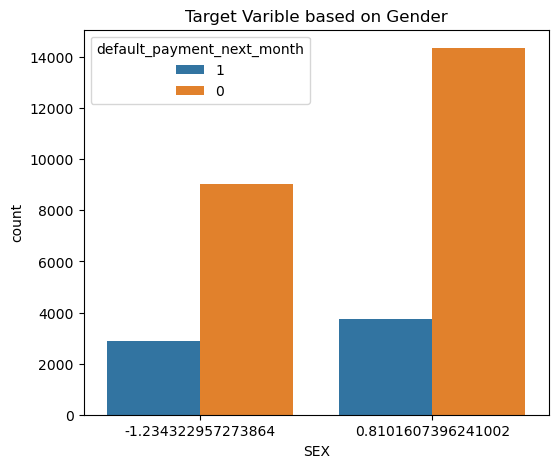

In [83]:
# Target Varible based on Gender with standardized values
f, ax = plt.subplots(figsize=(6, 5))
plt.title("Target Varible based on Gender")
sns.countplot(data = df, x ='SEX', hue='default_payment_next_month')
plt.show()

In [85]:
# This shows that default_payment_next_month and SEX have no linear relationship
correlation = df["default_payment_next_month"].corr(df["SEX"])
print(correlation)

-0.039960577705441806


In [87]:
# This shows that default_payment_next_month and MARRIAGE have no linear relationship
correlation = df["default_payment_next_month"].corr(df["MARRIAGE"])
print(correlation)

-0.024339215683404195


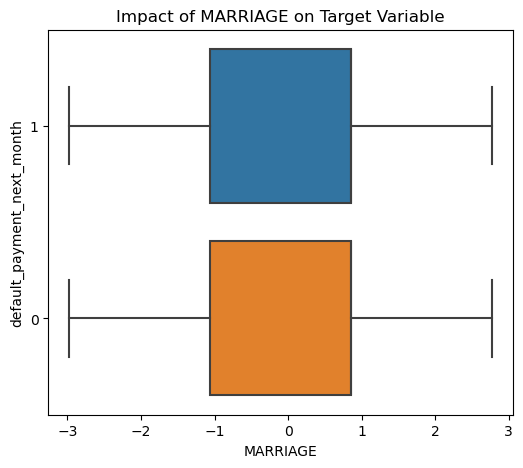

In [89]:
# Impact of MARRIAGE on Target Variable using box plot where marriage values are standardised.
f, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(x='MARRIAGE', y='default_payment_next_month', data=df)
plt.title("Impact of MARRIAGE on Target Variable")
plt.show()

## Model Development and Evaluation
### Model Training
### Performance Metrics
### Fairness Considerations

In [92]:
# Building model for classification and not numerical regression since target variable is 0 or 1 (binary).
# Use Logistic Regression instead of linear regression

## Load the dataset
features = ["LIMIT_BAL", "PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1",
            "BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
x = df.loc[:,features].values # extract all vales under these features columns
y = df.loc[:,'default_payment_next_month'].values
#print(x)

# standarize x because many features have different scales
x_Stand = StandardScaler().fit_transform(x)
#print(x_Stand)

In [94]:
# Imprort libraries
# metrics used for classification are : accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # to split the dataset into train and test subsets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [95]:
# Split the dataset
x_train,x_test,y_train,y_test = train_test_split(x_Stand,y,test_size = 0.2,random_state=324)

In [98]:
# shape of each variable
# Train is greater than test
print (x_train.shape)
print(y_train.shape)
print (x_test.shape)
print( y_test.shape)

(24000, 13)
(24000,)
(6000, 13)
(6000,)


In [100]:
# Create the model
reg_model = LogisticRegression()

In [102]:
# Train the model
reg_model.fit(x_train,y_train)

LogisticRegression()

In [104]:
# Make predictions
y_predicted = reg_model.predict(x_test)

In [106]:
# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_predicted)
report = classification_report(y_test, y_predicted)

In [108]:
# Accuracy is 0.812 which means the model has 81% accuracy
# Accuracy: Number of correct predictions over the total number of predictions.
# Precision:Out of all the instances that the model predicted as positive, how many were actually positive.
# Recall:Out of all the actual positive instances, how many did the model correctly identify?
# F1-Score:It is the harmonic mean between precision and recall.
print("Accuracy: ", accuracy) 
print(' ', report)

Accuracy:  0.8116666666666666
                precision    recall  f1-score   support

           0       0.82      0.98      0.89      4668
           1       0.74      0.23      0.35      1332

    accuracy                           0.81      6000
   macro avg       0.78      0.60      0.62      6000
weighted avg       0.80      0.81      0.77      6000



### Confusion Martix

[[4560  108]
 [1022  310]]

Class 0:
TP: 4560, FP: 1022, FN: 108, TN: 310
Class 1:
TP: 310, FP: 108, FN: 1022, TN: 4560


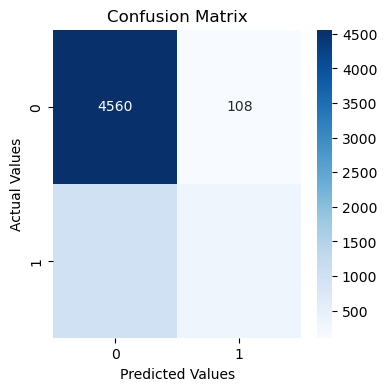

In [110]:
# Confusion Martix
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(4,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

print(cm)

print("")
num_classes = cm.shape[0]

# Initialize dictionaries to store TP, TN, FP, FN for each class
TP = {}
TN = {}
FP = {}
FN = {}

for i in range(num_classes):
    # True Positive: Diagonal element
    TP[i] = cm[i, i]
    
    # False Positive: Sum of the column excluding the diagonal element
    FP[i] = np.sum(cm[:, i]) - TP[i]
    
    # False Negative: Sum of the row excluding the diagonal element
    FN[i] = np.sum(cm[i, :]) - TP[i]
    
    # True Negative: Sum of all other elements not in the row/column
    TN[i] = np.sum(cm) - (TP[i] + FP[i] + FN[i])

# Print the results for each class
for i in range(num_classes):
    print(f"Class {i}:")
    print(f"TP: {TP[i]}, FP: {FP[i]}, FN: {FN[i]}, TN: {TN[i]}")